In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
my_mnist = input_data.read_data_sets("D:/Jupyter/tensorflow_understanding/MNIST_data_bak", one_hot=True) # onehot可写False

Extracting D:/Jupyter/tensorflow_understanding/MNIST_data_bak\train-images-idx3-ubyte.gz
Extracting D:/Jupyter/tensorflow_understanding/MNIST_data_bak\train-labels-idx1-ubyte.gz
Extracting D:/Jupyter/tensorflow_understanding/MNIST_data_bak\t10k-images-idx3-ubyte.gz
Extracting D:/Jupyter/tensorflow_understanding/MNIST_data_bak\t10k-labels-idx1-ubyte.gz


In [3]:
my_mnist #train:训练集 validation:检测集

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000013ABB44DCC0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000013ABB44DC50>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000013ABB44DD30>)

In [4]:
my_mnist.train.images.shape # 一共有55000张图片，每张图片为一个一维的(,784)数组， images存储样本X

(55000, 784)

In [5]:
first_image = my_mnist.train.images[0]

In [6]:
first_picture = np.reshape(first_image,(28, 28)) #第一张picture: 28 * 28 pixals

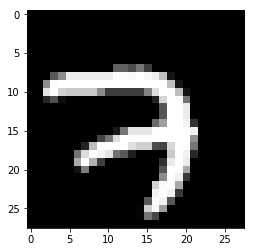

In [7]:
plt.imshow(first_picture, cmap=plt.get_cmap("gray"))

In [8]:
my_mnist.train.labels[0] # onehot编码 存储样本y

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [9]:
X = tf.placeholder(dtype=tf.float32, shape=(None, 784)) # 建立placeholder节点，用于存放样本X

In [10]:
W = tf.Variable(tf.zeros([784, 10])) # 初始化\theta
b = tf.Variable(tf.zeros([10]))  # 初始化 截距
X, W, b

(<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>,
 <tf.Variable 'Variable:0' shape=(784, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref>)

#### 线性变换
Z = XW + b
#### 激活函数
交叉熵函数由tf.nn.softma函数提供:<b/>
<pre>
tf.nn.softmax(
    logits, # 此时logits = Z
    axis=None,
    name=None,
    dim=None
)</pre><b/>
API：softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)

#### Softmax公式：
<center>$x=\frac{e^{z_j}}{\sum_{k=1}^K{e^{z_k}}} $ &nbsp;&nbsp;for j = 1,2,3,...,k </center>

In [11]:
Z = tf.matmul(X, W) + b
Z  # 此时的Z为线性变换后的和，还未进行非线性的激活函数的变换，shape=(?, 10)

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [12]:
y_pred = tf.nn.softmax(Z) 
y_pred # 根据softmax公式，计算出的y_pred为shape=(?, 10)的数组，数组的值表示所在分类的概率

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

In [13]:
y = tf.placeholder(dtype=tf.float32, shape=(None, 10))
y # 存放样本Y

<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>

#### CrossEntropy公式：
$$H(p,q) = -\sum_{x}P(x)logq(x)$$
在此处y_pred是机器预测的图像所对应数字的概率，因此我们要计算样本y与与测值y_pred的交叉熵<b>H(y, y_pred)</b>并使其最小,并用于反向传播

In [14]:
# 交叉熵公式，reduction_indices=[1]表示行相加
cross_entropy = tf.reduce_mean(-tf.reduce_mean(y * tf.log(y_pred), reduction_indices=[1])) 

#### API of GradientDescentOptimizer
<pre>
__init__(
    learning_rate, # 此时learning_rate = 0.01
    use_locking=False,
    name='GradientDescent'
)
minimize(# This method simply combines calls compute_gradients() and apply_gradients()
    loss, # 此时loss = cross_entropy 
    global_step=None,
    var_list=None,
    gate_gradients=GATE_OP,
    aggregation_method=None,
    colocate_gradients_with_ops=False,
    name=None,
    grad_loss=None
)
</pre>

In [15]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

#### API of tf.argmax
<pre>
tf.math.argmax(# 返回数组中最大的值的下标
    input,
    axis=None, # axis = 0时,表示按列计算; axis = 1时,表示按行计算
    name=None,
    dimension=None,
    output_type=tf.int64
)
</pre>


In [16]:
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1)) # tf.equal 返回True和false组成的一维数组

In [17]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # tf.cast 可以转换数据类型

In [18]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for _ in range(10000):
        batch_xs, batch_ys = my_mnist.train.next_batch(100) 
        sess.run(train_step, feed_dict={X:batch_xs, y:batch_ys})
        print("Trainset batch acc：%s" % accuracy.eval({X:batch_xs, y:batch_ys}))
        print("ValidSet acc : %s" % accuracy.eval({X: my_mnist.validation.images, y: my_mnist.validation.labels}))
        
    print("TestSet acc : %s" % accuracy.eval({X: my_mnist.test.images, y: my_mnist.test.labels}))

Trainset batch acc：0.32
ValidSet acc : 0.1918
Trainset batch acc：0.27
ValidSet acc : 0.216
Trainset batch acc：0.61
ValidSet acc : 0.493
Trainset batch acc：0.52
ValidSet acc : 0.5136
Trainset batch acc：0.62
ValidSet acc : 0.587
Trainset batch acc：0.67
ValidSet acc : 0.6196
Trainset batch acc：0.63
ValidSet acc : 0.6134
Trainset batch acc：0.71
ValidSet acc : 0.6372
Trainset batch acc：0.58
ValidSet acc : 0.5492
Trainset batch acc：0.44
ValidSet acc : 0.3892
Trainset batch acc：0.5
ValidSet acc : 0.4296
Trainset batch acc：0.47
ValidSet acc : 0.45
Trainset batch acc：0.5
ValidSet acc : 0.4028
Trainset batch acc：0.46
ValidSet acc : 0.4384
Trainset batch acc：0.47
ValidSet acc : 0.4146
Trainset batch acc：0.54
ValidSet acc : 0.4016
Trainset batch acc：0.49
ValidSet acc : 0.4634
Trainset batch acc：0.52
ValidSet acc : 0.4832
Trainset batch acc：0.61
ValidSet acc : 0.4866
Trainset batch acc：0.57
ValidSet acc : 0.4888
Trainset batch acc：0.54
ValidSet acc : 0.4928
Trainset batch acc：0.61
ValidSet acc : 0.

Trainset batch acc：0.59
ValidSet acc : 0.7256
Trainset batch acc：0.7
ValidSet acc : 0.7232
Trainset batch acc：0.7
ValidSet acc : 0.7208
Trainset batch acc：0.7
ValidSet acc : 0.7216
Trainset batch acc：0.68
ValidSet acc : 0.7218
Trainset batch acc：0.67
ValidSet acc : 0.724
Trainset batch acc：0.71
ValidSet acc : 0.724
Trainset batch acc：0.63
ValidSet acc : 0.725
Trainset batch acc：0.79
ValidSet acc : 0.7246
Trainset batch acc：0.73
ValidSet acc : 0.725
Trainset batch acc：0.71
ValidSet acc : 0.726
Trainset batch acc：0.78
ValidSet acc : 0.7252
Trainset batch acc：0.75
ValidSet acc : 0.7268
Trainset batch acc：0.7
ValidSet acc : 0.7284
Trainset batch acc：0.77
ValidSet acc : 0.7296
Trainset batch acc：0.74
ValidSet acc : 0.7302
Trainset batch acc：0.7
ValidSet acc : 0.729
Trainset batch acc：0.74
ValidSet acc : 0.7308
Trainset batch acc：0.72
ValidSet acc : 0.7298
Trainset batch acc：0.67
ValidSet acc : 0.729
Trainset batch acc：0.79
ValidSet acc : 0.728
Trainset batch acc：0.75
ValidSet acc : 0.7282
T

Trainset batch acc：0.63
ValidSet acc : 0.7392
Trainset batch acc：0.75
ValidSet acc : 0.7398
Trainset batch acc：0.74
ValidSet acc : 0.7392
Trainset batch acc：0.82
ValidSet acc : 0.7384
Trainset batch acc：0.7
ValidSet acc : 0.7394
Trainset batch acc：0.73
ValidSet acc : 0.7386
Trainset batch acc：0.69
ValidSet acc : 0.7396
Trainset batch acc：0.83
ValidSet acc : 0.7402
Trainset batch acc：0.77
ValidSet acc : 0.7402
Trainset batch acc：0.68
ValidSet acc : 0.741
Trainset batch acc：0.69
ValidSet acc : 0.7406
Trainset batch acc：0.74
ValidSet acc : 0.7414
Trainset batch acc：0.73
ValidSet acc : 0.7416
Trainset batch acc：0.76
ValidSet acc : 0.7406
Trainset batch acc：0.79
ValidSet acc : 0.7396
Trainset batch acc：0.84
ValidSet acc : 0.7394
Trainset batch acc：0.75
ValidSet acc : 0.74
Trainset batch acc：0.76
ValidSet acc : 0.739
Trainset batch acc：0.68
ValidSet acc : 0.7398
Trainset batch acc：0.74
ValidSet acc : 0.7402
Trainset batch acc：0.73
ValidSet acc : 0.741
Trainset batch acc：0.8
ValidSet acc : 0.

ValidSet acc : 0.7612
Trainset batch acc：0.66
ValidSet acc : 0.7622
Trainset batch acc：0.74
ValidSet acc : 0.762
Trainset batch acc：0.65
ValidSet acc : 0.7616
Trainset batch acc：0.7
ValidSet acc : 0.7624
Trainset batch acc：0.76
ValidSet acc : 0.7628
Trainset batch acc：0.8
ValidSet acc : 0.762
Trainset batch acc：0.79
ValidSet acc : 0.7616
Trainset batch acc：0.74
ValidSet acc : 0.7624
Trainset batch acc：0.85
ValidSet acc : 0.7628
Trainset batch acc：0.78
ValidSet acc : 0.7626
Trainset batch acc：0.7
ValidSet acc : 0.7634
Trainset batch acc：0.79
ValidSet acc : 0.7632
Trainset batch acc：0.8
ValidSet acc : 0.7634
Trainset batch acc：0.83
ValidSet acc : 0.7626
Trainset batch acc：0.8
ValidSet acc : 0.7626
Trainset batch acc：0.73
ValidSet acc : 0.7624
Trainset batch acc：0.74
ValidSet acc : 0.7632
Trainset batch acc：0.76
ValidSet acc : 0.7638
Trainset batch acc：0.76
ValidSet acc : 0.7642
Trainset batch acc：0.75
ValidSet acc : 0.7636
Trainset batch acc：0.7
ValidSet acc : 0.7636
Trainset batch acc：0

Trainset batch acc：0.83
ValidSet acc : 0.7732
Trainset batch acc：0.73
ValidSet acc : 0.7728
Trainset batch acc：0.78
ValidSet acc : 0.7736
Trainset batch acc：0.73
ValidSet acc : 0.7736
Trainset batch acc：0.82
ValidSet acc : 0.7738
Trainset batch acc：0.79
ValidSet acc : 0.7736
Trainset batch acc：0.79
ValidSet acc : 0.7728
Trainset batch acc：0.83
ValidSet acc : 0.772
Trainset batch acc：0.74
ValidSet acc : 0.7718
Trainset batch acc：0.8
ValidSet acc : 0.772
Trainset batch acc：0.75
ValidSet acc : 0.7722
Trainset batch acc：0.79
ValidSet acc : 0.7726
Trainset batch acc：0.82
ValidSet acc : 0.7728
Trainset batch acc：0.81
ValidSet acc : 0.7716
Trainset batch acc：0.79
ValidSet acc : 0.7718
Trainset batch acc：0.76
ValidSet acc : 0.7718
Trainset batch acc：0.74
ValidSet acc : 0.7724
Trainset batch acc：0.8
ValidSet acc : 0.7728
Trainset batch acc：0.73
ValidSet acc : 0.7734
Trainset batch acc：0.7
ValidSet acc : 0.7724
Trainset batch acc：0.74
ValidSet acc : 0.773
Trainset batch acc：0.78
ValidSet acc : 0

Trainset batch acc：0.81
ValidSet acc : 0.78
Trainset batch acc：0.77
ValidSet acc : 0.7798
Trainset batch acc：0.75
ValidSet acc : 0.78
Trainset batch acc：0.78
ValidSet acc : 0.7798
Trainset batch acc：0.73
ValidSet acc : 0.78
Trainset batch acc：0.82
ValidSet acc : 0.7796
Trainset batch acc：0.81
ValidSet acc : 0.78
Trainset batch acc：0.72
ValidSet acc : 0.78
Trainset batch acc：0.75
ValidSet acc : 0.78
Trainset batch acc：0.77
ValidSet acc : 0.7796
Trainset batch acc：0.78
ValidSet acc : 0.7792
Trainset batch acc：0.81
ValidSet acc : 0.78
Trainset batch acc：0.77
ValidSet acc : 0.7806
Trainset batch acc：0.79
ValidSet acc : 0.7806
Trainset batch acc：0.77
ValidSet acc : 0.7806
Trainset batch acc：0.77
ValidSet acc : 0.7802
Trainset batch acc：0.76
ValidSet acc : 0.7804
Trainset batch acc：0.67
ValidSet acc : 0.781
Trainset batch acc：0.81
ValidSet acc : 0.7802
Trainset batch acc：0.84
ValidSet acc : 0.7806
Trainset batch acc：0.79
ValidSet acc : 0.7802
Trainset batch acc：0.81
ValidSet acc : 0.7802
Tra

ValidSet acc : 0.7888
Trainset batch acc：0.8
ValidSet acc : 0.7894
Trainset batch acc：0.73
ValidSet acc : 0.7894
Trainset batch acc：0.76
ValidSet acc : 0.7888
Trainset batch acc：0.78
ValidSet acc : 0.7896
Trainset batch acc：0.81
ValidSet acc : 0.7894
Trainset batch acc：0.83
ValidSet acc : 0.7886
Trainset batch acc：0.73
ValidSet acc : 0.7882
Trainset batch acc：0.75
ValidSet acc : 0.7884
Trainset batch acc：0.78
ValidSet acc : 0.7884
Trainset batch acc：0.82
ValidSet acc : 0.7878
Trainset batch acc：0.81
ValidSet acc : 0.7878
Trainset batch acc：0.74
ValidSet acc : 0.7878
Trainset batch acc：0.76
ValidSet acc : 0.7872
Trainset batch acc：0.79
ValidSet acc : 0.7874
Trainset batch acc：0.72
ValidSet acc : 0.7874
Trainset batch acc：0.8
ValidSet acc : 0.7878
Trainset batch acc：0.76
ValidSet acc : 0.788
Trainset batch acc：0.83
ValidSet acc : 0.7876
Trainset batch acc：0.78
ValidSet acc : 0.7884
Trainset batch acc：0.81
ValidSet acc : 0.7886
Trainset batch acc：0.76
ValidSet acc : 0.7886
Trainset batch 

Trainset batch acc：0.73
ValidSet acc : 0.7932
Trainset batch acc：0.81
ValidSet acc : 0.7934
Trainset batch acc：0.77
ValidSet acc : 0.7936
Trainset batch acc：0.75
ValidSet acc : 0.7934
Trainset batch acc：0.78
ValidSet acc : 0.7934
Trainset batch acc：0.81
ValidSet acc : 0.793
Trainset batch acc：0.79
ValidSet acc : 0.7934
Trainset batch acc：0.75
ValidSet acc : 0.7932
Trainset batch acc：0.78
ValidSet acc : 0.7928
Trainset batch acc：0.73
ValidSet acc : 0.7932
Trainset batch acc：0.8
ValidSet acc : 0.7928
Trainset batch acc：0.8
ValidSet acc : 0.7938
Trainset batch acc：0.82
ValidSet acc : 0.7934
Trainset batch acc：0.79
ValidSet acc : 0.7938
Trainset batch acc：0.78
ValidSet acc : 0.7938
Trainset batch acc：0.84
ValidSet acc : 0.7938
Trainset batch acc：0.84
ValidSet acc : 0.7936
Trainset batch acc：0.75
ValidSet acc : 0.7934
Trainset batch acc：0.84
ValidSet acc : 0.7932
Trainset batch acc：0.85
ValidSet acc : 0.7934
Trainset batch acc：0.8
ValidSet acc : 0.7938
Trainset batch acc：0.71
ValidSet acc :

Trainset batch acc：0.86
ValidSet acc : 0.7968
Trainset batch acc：0.82
ValidSet acc : 0.7964
Trainset batch acc：0.74
ValidSet acc : 0.7964
Trainset batch acc：0.81
ValidSet acc : 0.7968
Trainset batch acc：0.8
ValidSet acc : 0.7966
Trainset batch acc：0.83
ValidSet acc : 0.7966
Trainset batch acc：0.78
ValidSet acc : 0.7966
Trainset batch acc：0.83
ValidSet acc : 0.7968
Trainset batch acc：0.75
ValidSet acc : 0.797
Trainset batch acc：0.8
ValidSet acc : 0.7968
Trainset batch acc：0.82
ValidSet acc : 0.7972
Trainset batch acc：0.76
ValidSet acc : 0.7972
Trainset batch acc：0.81
ValidSet acc : 0.797
Trainset batch acc：0.74
ValidSet acc : 0.797
Trainset batch acc：0.89
ValidSet acc : 0.7968
Trainset batch acc：0.82
ValidSet acc : 0.7968
Trainset batch acc：0.79
ValidSet acc : 0.7968
Trainset batch acc：0.83
ValidSet acc : 0.7978
Trainset batch acc：0.78
ValidSet acc : 0.7976
Trainset batch acc：0.71
ValidSet acc : 0.7976
Trainset batch acc：0.85
ValidSet acc : 0.7976
Trainset batch acc：0.79
ValidSet acc : 

Trainset batch acc：0.85
ValidSet acc : 0.8016
Trainset batch acc：0.77
ValidSet acc : 0.8018
Trainset batch acc：0.81
ValidSet acc : 0.801
Trainset batch acc：0.76
ValidSet acc : 0.8012
Trainset batch acc：0.82
ValidSet acc : 0.8012
Trainset batch acc：0.78
ValidSet acc : 0.8014
Trainset batch acc：0.81
ValidSet acc : 0.8012
Trainset batch acc：0.78
ValidSet acc : 0.8014
Trainset batch acc：0.84
ValidSet acc : 0.8018
Trainset batch acc：0.78
ValidSet acc : 0.8012
Trainset batch acc：0.81
ValidSet acc : 0.8008
Trainset batch acc：0.85
ValidSet acc : 0.8014
Trainset batch acc：0.78
ValidSet acc : 0.802
Trainset batch acc：0.82
ValidSet acc : 0.8018
Trainset batch acc：0.87
ValidSet acc : 0.8014
Trainset batch acc：0.82
ValidSet acc : 0.8016
Trainset batch acc：0.83
ValidSet acc : 0.8016
Trainset batch acc：0.76
ValidSet acc : 0.8022
Trainset batch acc：0.83
ValidSet acc : 0.802
Trainset batch acc：0.76
ValidSet acc : 0.8016
Trainset batch acc：0.77
ValidSet acc : 0.8016
Trainset batch acc：0.82
ValidSet acc 

Trainset batch acc：0.76
ValidSet acc : 0.8052
Trainset batch acc：0.79
ValidSet acc : 0.8052
Trainset batch acc：0.81
ValidSet acc : 0.8052
Trainset batch acc：0.84
ValidSet acc : 0.8054
Trainset batch acc：0.83
ValidSet acc : 0.8052
Trainset batch acc：0.82
ValidSet acc : 0.8052
Trainset batch acc：0.81
ValidSet acc : 0.8052
Trainset batch acc：0.86
ValidSet acc : 0.8054
Trainset batch acc：0.8
ValidSet acc : 0.805
Trainset batch acc：0.85
ValidSet acc : 0.8056
Trainset batch acc：0.84
ValidSet acc : 0.8054
Trainset batch acc：0.88
ValidSet acc : 0.805
Trainset batch acc：0.79
ValidSet acc : 0.8046
Trainset batch acc：0.73
ValidSet acc : 0.8046
Trainset batch acc：0.75
ValidSet acc : 0.8052
Trainset batch acc：0.87
ValidSet acc : 0.8048
Trainset batch acc：0.81
ValidSet acc : 0.8048
Trainset batch acc：0.81
ValidSet acc : 0.805
Trainset batch acc：0.85
ValidSet acc : 0.805
Trainset batch acc：0.82
ValidSet acc : 0.805
Trainset batch acc：0.76
ValidSet acc : 0.8054
Trainset batch acc：0.73
ValidSet acc : 0

Trainset batch acc：0.79
ValidSet acc : 0.8116
Trainset batch acc：0.81
ValidSet acc : 0.8118
Trainset batch acc：0.84
ValidSet acc : 0.8118
Trainset batch acc：0.82
ValidSet acc : 0.8118
Trainset batch acc：0.86
ValidSet acc : 0.8114
Trainset batch acc：0.76
ValidSet acc : 0.8112
Trainset batch acc：0.81
ValidSet acc : 0.8108
Trainset batch acc：0.84
ValidSet acc : 0.8112
Trainset batch acc：0.9
ValidSet acc : 0.8114
Trainset batch acc：0.82
ValidSet acc : 0.8116
Trainset batch acc：0.74
ValidSet acc : 0.8118
Trainset batch acc：0.78
ValidSet acc : 0.8118
Trainset batch acc：0.85
ValidSet acc : 0.812
Trainset batch acc：0.87
ValidSet acc : 0.812
Trainset batch acc：0.82
ValidSet acc : 0.8126
Trainset batch acc：0.89
ValidSet acc : 0.8122
Trainset batch acc：0.81
ValidSet acc : 0.8124
Trainset batch acc：0.73
ValidSet acc : 0.8122
Trainset batch acc：0.81
ValidSet acc : 0.8124
Trainset batch acc：0.85
ValidSet acc : 0.8124
Trainset batch acc：0.8
ValidSet acc : 0.8124
Trainset batch acc：0.84
ValidSet acc :

Trainset batch acc：0.87
ValidSet acc : 0.8144
Trainset batch acc：0.76
ValidSet acc : 0.815
Trainset batch acc：0.77
ValidSet acc : 0.8148
Trainset batch acc：0.83
ValidSet acc : 0.815
Trainset batch acc：0.85
ValidSet acc : 0.8148
Trainset batch acc：0.85
ValidSet acc : 0.8146
Trainset batch acc：0.81
ValidSet acc : 0.8148
Trainset batch acc：0.78
ValidSet acc : 0.815
Trainset batch acc：0.8
ValidSet acc : 0.815
Trainset batch acc：0.89
ValidSet acc : 0.8144
Trainset batch acc：0.87
ValidSet acc : 0.8144
Trainset batch acc：0.89
ValidSet acc : 0.8146
Trainset batch acc：0.83
ValidSet acc : 0.8146
Trainset batch acc：0.77
ValidSet acc : 0.8144
Trainset batch acc：0.8
ValidSet acc : 0.8142
Trainset batch acc：0.83
ValidSet acc : 0.8142
Trainset batch acc：0.83
ValidSet acc : 0.8142
Trainset batch acc：0.85
ValidSet acc : 0.814
Trainset batch acc：0.84
ValidSet acc : 0.814
Trainset batch acc：0.81
ValidSet acc : 0.8144
Trainset batch acc：0.76
ValidSet acc : 0.8146
Trainset batch acc：0.82
ValidSet acc : 0.8

Trainset batch acc：0.85
ValidSet acc : 0.8192
Trainset batch acc：0.74
ValidSet acc : 0.8192
Trainset batch acc：0.75
ValidSet acc : 0.8192
Trainset batch acc：0.8
ValidSet acc : 0.8194
Trainset batch acc：0.91
ValidSet acc : 0.8192
Trainset batch acc：0.78
ValidSet acc : 0.8192
Trainset batch acc：0.82
ValidSet acc : 0.8192
Trainset batch acc：0.82
ValidSet acc : 0.8192
Trainset batch acc：0.81
ValidSet acc : 0.8194
Trainset batch acc：0.84
ValidSet acc : 0.8196
Trainset batch acc：0.89
ValidSet acc : 0.8192
Trainset batch acc：0.85
ValidSet acc : 0.82
Trainset batch acc：0.84
ValidSet acc : 0.8198
Trainset batch acc：0.78
ValidSet acc : 0.8198
Trainset batch acc：0.83
ValidSet acc : 0.8204
Trainset batch acc：0.85
ValidSet acc : 0.8202
Trainset batch acc：0.86
ValidSet acc : 0.8204
Trainset batch acc：0.89
ValidSet acc : 0.8204
Trainset batch acc：0.79
ValidSet acc : 0.82
Trainset batch acc：0.85
ValidSet acc : 0.82
Trainset batch acc：0.89
ValidSet acc : 0.8198
Trainset batch acc：0.89
ValidSet acc : 0.

Trainset batch acc：0.78
ValidSet acc : 0.8232
Trainset batch acc：0.85
ValidSet acc : 0.823
Trainset batch acc：0.8
ValidSet acc : 0.8232
Trainset batch acc：0.71
ValidSet acc : 0.8226
Trainset batch acc：0.79
ValidSet acc : 0.8228
Trainset batch acc：0.82
ValidSet acc : 0.8226
Trainset batch acc：0.78
ValidSet acc : 0.8228
Trainset batch acc：0.82
ValidSet acc : 0.8228
Trainset batch acc：0.87
ValidSet acc : 0.8228
Trainset batch acc：0.75
ValidSet acc : 0.8226
Trainset batch acc：0.82
ValidSet acc : 0.8228
Trainset batch acc：0.85
ValidSet acc : 0.8228
Trainset batch acc：0.79
ValidSet acc : 0.823
Trainset batch acc：0.71
ValidSet acc : 0.8228
Trainset batch acc：0.75
ValidSet acc : 0.8228
Trainset batch acc：0.84
ValidSet acc : 0.8228
Trainset batch acc：0.79
ValidSet acc : 0.8226
Trainset batch acc：0.86
ValidSet acc : 0.8228
Trainset batch acc：0.83
ValidSet acc : 0.823
Trainset batch acc：0.76
ValidSet acc : 0.823
Trainset batch acc：0.78
ValidSet acc : 0.8232
Trainset batch acc：0.83
ValidSet acc : 

Trainset batch acc：0.82
ValidSet acc : 0.8266
Trainset batch acc：0.84
ValidSet acc : 0.827
Trainset batch acc：0.81
ValidSet acc : 0.8274
Trainset batch acc：0.81
ValidSet acc : 0.8274
Trainset batch acc：0.8
ValidSet acc : 0.8272
Trainset batch acc：0.86
ValidSet acc : 0.8272
Trainset batch acc：0.79
ValidSet acc : 0.8274
Trainset batch acc：0.79
ValidSet acc : 0.8274
Trainset batch acc：0.82
ValidSet acc : 0.8274
Trainset batch acc：0.86
ValidSet acc : 0.8272
Trainset batch acc：0.8
ValidSet acc : 0.8272
Trainset batch acc：0.84
ValidSet acc : 0.8272
Trainset batch acc：0.8
ValidSet acc : 0.8272
Trainset batch acc：0.82
ValidSet acc : 0.8272
Trainset batch acc：0.84
ValidSet acc : 0.827
Trainset batch acc：0.85
ValidSet acc : 0.827
Trainset batch acc：0.75
ValidSet acc : 0.827
Trainset batch acc：0.85
ValidSet acc : 0.8272
Trainset batch acc：0.75
ValidSet acc : 0.8272
Trainset batch acc：0.8
ValidSet acc : 0.8276
Trainset batch acc：0.78
ValidSet acc : 0.8276
Trainset batch acc：0.85
ValidSet acc : 0.8

ValidSet acc : 0.8292
Trainset batch acc：0.7
ValidSet acc : 0.8292
Trainset batch acc：0.83
ValidSet acc : 0.829
Trainset batch acc：0.85
ValidSet acc : 0.829
Trainset batch acc：0.85
ValidSet acc : 0.829
Trainset batch acc：0.8
ValidSet acc : 0.8288
Trainset batch acc：0.8
ValidSet acc : 0.8288
Trainset batch acc：0.85
ValidSet acc : 0.8286
Trainset batch acc：0.83
ValidSet acc : 0.8288
Trainset batch acc：0.83
ValidSet acc : 0.8286
Trainset batch acc：0.8
ValidSet acc : 0.8292
Trainset batch acc：0.82
ValidSet acc : 0.8292
Trainset batch acc：0.83
ValidSet acc : 0.829
Trainset batch acc：0.86
ValidSet acc : 0.829
Trainset batch acc：0.86
ValidSet acc : 0.8288
Trainset batch acc：0.84
ValidSet acc : 0.8288
Trainset batch acc：0.85
ValidSet acc : 0.829
Trainset batch acc：0.87
ValidSet acc : 0.8288
Trainset batch acc：0.76
ValidSet acc : 0.8288
Trainset batch acc：0.84
ValidSet acc : 0.829
Trainset batch acc：0.82
ValidSet acc : 0.829
Trainset batch acc：0.84
ValidSet acc : 0.829
Trainset batch acc：0.87
V

ValidSet acc : 0.8312
Trainset batch acc：0.77
ValidSet acc : 0.8312
Trainset batch acc：0.8
ValidSet acc : 0.8312
Trainset batch acc：0.82
ValidSet acc : 0.8312
Trainset batch acc：0.77
ValidSet acc : 0.8312
Trainset batch acc：0.82
ValidSet acc : 0.8312
Trainset batch acc：0.88
ValidSet acc : 0.8312
Trainset batch acc：0.83
ValidSet acc : 0.8312
Trainset batch acc：0.76
ValidSet acc : 0.8312
Trainset batch acc：0.79
ValidSet acc : 0.8308
Trainset batch acc：0.8
ValidSet acc : 0.8316
Trainset batch acc：0.79
ValidSet acc : 0.8316
Trainset batch acc：0.81
ValidSet acc : 0.8316
Trainset batch acc：0.87
ValidSet acc : 0.8312
Trainset batch acc：0.82
ValidSet acc : 0.8312
Trainset batch acc：0.89
ValidSet acc : 0.8316
Trainset batch acc：0.81
ValidSet acc : 0.8316
Trainset batch acc：0.81
ValidSet acc : 0.8316
Trainset batch acc：0.81
ValidSet acc : 0.8316
Trainset batch acc：0.81
ValidSet acc : 0.8314
Trainset batch acc：0.89
ValidSet acc : 0.8314
Trainset batch acc：0.77
ValidSet acc : 0.8314
Trainset batch

Trainset batch acc：0.81
ValidSet acc : 0.8332
Trainset batch acc：0.77
ValidSet acc : 0.8336
Trainset batch acc：0.84
ValidSet acc : 0.8338
Trainset batch acc：0.84
ValidSet acc : 0.8336
Trainset batch acc：0.88
ValidSet acc : 0.8338
Trainset batch acc：0.81
ValidSet acc : 0.8338
Trainset batch acc：0.84
ValidSet acc : 0.8338
Trainset batch acc：0.86
ValidSet acc : 0.8338
Trainset batch acc：0.81
ValidSet acc : 0.8338
Trainset batch acc：0.85
ValidSet acc : 0.8336
Trainset batch acc：0.84
ValidSet acc : 0.8336
Trainset batch acc：0.79
ValidSet acc : 0.8342
Trainset batch acc：0.79
ValidSet acc : 0.834
Trainset batch acc：0.79
ValidSet acc : 0.8344
Trainset batch acc：0.81
ValidSet acc : 0.8346
Trainset batch acc：0.79
ValidSet acc : 0.8346
Trainset batch acc：0.79
ValidSet acc : 0.8342
Trainset batch acc：0.81
ValidSet acc : 0.8344
Trainset batch acc：0.83
ValidSet acc : 0.8342
Trainset batch acc：0.82
ValidSet acc : 0.834
Trainset batch acc：0.85
ValidSet acc : 0.8338
Trainset batch acc：0.79
ValidSet acc

Trainset batch acc：0.84
ValidSet acc : 0.8364
Trainset batch acc：0.92
ValidSet acc : 0.8364
Trainset batch acc：0.83
ValidSet acc : 0.8364
Trainset batch acc：0.78
ValidSet acc : 0.8364
Trainset batch acc：0.82
ValidSet acc : 0.8366
Trainset batch acc：0.81
ValidSet acc : 0.8364
Trainset batch acc：0.84
ValidSet acc : 0.8366
Trainset batch acc：0.79
ValidSet acc : 0.8366
Trainset batch acc：0.82
ValidSet acc : 0.8366
Trainset batch acc：0.78
ValidSet acc : 0.8368
Trainset batch acc：0.78
ValidSet acc : 0.8362
Trainset batch acc：0.88
ValidSet acc : 0.8368
Trainset batch acc：0.84
ValidSet acc : 0.8368
Trainset batch acc：0.92
ValidSet acc : 0.8368
Trainset batch acc：0.85
ValidSet acc : 0.8364
Trainset batch acc：0.85
ValidSet acc : 0.8362
Trainset batch acc：0.76
ValidSet acc : 0.8366
Trainset batch acc：0.85
ValidSet acc : 0.837
Trainset batch acc：0.79
ValidSet acc : 0.8366
Trainset batch acc：0.85
ValidSet acc : 0.8366
Trainset batch acc：0.83
ValidSet acc : 0.837
Trainset batch acc：0.78
ValidSet acc

ValidSet acc : 0.8378
Trainset batch acc：0.88
ValidSet acc : 0.8378
Trainset batch acc：0.84
ValidSet acc : 0.8382
Trainset batch acc：0.84
ValidSet acc : 0.838
Trainset batch acc：0.78
ValidSet acc : 0.838
Trainset batch acc：0.78
ValidSet acc : 0.838
Trainset batch acc：0.76
ValidSet acc : 0.8378
Trainset batch acc：0.84
ValidSet acc : 0.8376
Trainset batch acc：0.82
ValidSet acc : 0.8376
Trainset batch acc：0.81
ValidSet acc : 0.8378
Trainset batch acc：0.79
ValidSet acc : 0.8378
Trainset batch acc：0.82
ValidSet acc : 0.8378
Trainset batch acc：0.7
ValidSet acc : 0.8378
Trainset batch acc：0.86
ValidSet acc : 0.8378
Trainset batch acc：0.83
ValidSet acc : 0.8374
Trainset batch acc：0.85
ValidSet acc : 0.8376
Trainset batch acc：0.83
ValidSet acc : 0.8378
Trainset batch acc：0.82
ValidSet acc : 0.8378
Trainset batch acc：0.88
ValidSet acc : 0.8378
Trainset batch acc：0.79
ValidSet acc : 0.8378
Trainset batch acc：0.89
ValidSet acc : 0.8378
Trainset batch acc：0.85
ValidSet acc : 0.8382
Trainset batch a

Trainset batch acc：0.83
ValidSet acc : 0.8402
Trainset batch acc：0.83
ValidSet acc : 0.8402
Trainset batch acc：0.86
ValidSet acc : 0.84
Trainset batch acc：0.81
ValidSet acc : 0.8402
Trainset batch acc：0.87
ValidSet acc : 0.8402
Trainset batch acc：0.82
ValidSet acc : 0.8406
Trainset batch acc：0.85
ValidSet acc : 0.8402
Trainset batch acc：0.86
ValidSet acc : 0.84
Trainset batch acc：0.84
ValidSet acc : 0.8402
Trainset batch acc：0.87
ValidSet acc : 0.8402
Trainset batch acc：0.8
ValidSet acc : 0.8406
Trainset batch acc：0.88
ValidSet acc : 0.8402
Trainset batch acc：0.88
ValidSet acc : 0.8402
Trainset batch acc：0.78
ValidSet acc : 0.8402
Trainset batch acc：0.82
ValidSet acc : 0.8402
Trainset batch acc：0.83
ValidSet acc : 0.8402
Trainset batch acc：0.88
ValidSet acc : 0.8404
Trainset batch acc：0.82
ValidSet acc : 0.8402
Trainset batch acc：0.82
ValidSet acc : 0.8406
Trainset batch acc：0.87
ValidSet acc : 0.8406
Trainset batch acc：0.82
ValidSet acc : 0.8406
Trainset batch acc：0.82
ValidSet acc : 

Trainset batch acc：0.84
ValidSet acc : 0.8416
Trainset batch acc：0.76
ValidSet acc : 0.8414
Trainset batch acc：0.79
ValidSet acc : 0.8416
Trainset batch acc：0.87
ValidSet acc : 0.8416
Trainset batch acc：0.87
ValidSet acc : 0.8416
Trainset batch acc：0.79
ValidSet acc : 0.8416
Trainset batch acc：0.82
ValidSet acc : 0.842
Trainset batch acc：0.88
ValidSet acc : 0.842
Trainset batch acc：0.83
ValidSet acc : 0.842
Trainset batch acc：0.9
ValidSet acc : 0.842
Trainset batch acc：0.81
ValidSet acc : 0.842
Trainset batch acc：0.85
ValidSet acc : 0.8416
Trainset batch acc：0.83
ValidSet acc : 0.8418
Trainset batch acc：0.86
ValidSet acc : 0.8418
Trainset batch acc：0.78
ValidSet acc : 0.8416
Trainset batch acc：0.87
ValidSet acc : 0.842
Trainset batch acc：0.75
ValidSet acc : 0.842
Trainset batch acc：0.85
ValidSet acc : 0.8418
Trainset batch acc：0.84
ValidSet acc : 0.842
Trainset batch acc：0.79
ValidSet acc : 0.842
Trainset batch acc：0.8
ValidSet acc : 0.842
Trainset batch acc：0.8
ValidSet acc : 0.8418
T

Trainset batch acc：0.82
ValidSet acc : 0.842
Trainset batch acc：0.78
ValidSet acc : 0.8422
Trainset batch acc：0.88
ValidSet acc : 0.8422
Trainset batch acc：0.79
ValidSet acc : 0.8422
Trainset batch acc：0.85
ValidSet acc : 0.8422
Trainset batch acc：0.82
ValidSet acc : 0.8422
Trainset batch acc：0.83
ValidSet acc : 0.8424
Trainset batch acc：0.87
ValidSet acc : 0.8422
Trainset batch acc：0.85
ValidSet acc : 0.8422
Trainset batch acc：0.88
ValidSet acc : 0.8424
Trainset batch acc：0.8
ValidSet acc : 0.8426
Trainset batch acc：0.92
ValidSet acc : 0.8426
Trainset batch acc：0.77
ValidSet acc : 0.8426
Trainset batch acc：0.81
ValidSet acc : 0.8426
Trainset batch acc：0.79
ValidSet acc : 0.8428
Trainset batch acc：0.79
ValidSet acc : 0.8428
Trainset batch acc：0.82
ValidSet acc : 0.8428
Trainset batch acc：0.88
ValidSet acc : 0.8426
Trainset batch acc：0.91
ValidSet acc : 0.8426
Trainset batch acc：0.91
ValidSet acc : 0.8424
Trainset batch acc：0.84
ValidSet acc : 0.8424
Trainset batch acc：0.8
ValidSet acc 

Trainset batch acc：0.81
ValidSet acc : 0.8458
Trainset batch acc：0.87
ValidSet acc : 0.8456
Trainset batch acc：0.85
ValidSet acc : 0.8458
Trainset batch acc：0.85
ValidSet acc : 0.846
Trainset batch acc：0.78
ValidSet acc : 0.8458
Trainset batch acc：0.8
ValidSet acc : 0.846
Trainset batch acc：0.82
ValidSet acc : 0.846
Trainset batch acc：0.83
ValidSet acc : 0.8462
Trainset batch acc：0.9
ValidSet acc : 0.8458
Trainset batch acc：0.89
ValidSet acc : 0.8456
Trainset batch acc：0.92
ValidSet acc : 0.8458
Trainset batch acc：0.88
ValidSet acc : 0.8458
Trainset batch acc：0.86
ValidSet acc : 0.8458
Trainset batch acc：0.89
ValidSet acc : 0.8456
Trainset batch acc：0.85
ValidSet acc : 0.8458
Trainset batch acc：0.81
ValidSet acc : 0.846
Trainset batch acc：0.82
ValidSet acc : 0.8458
Trainset batch acc：0.78
ValidSet acc : 0.846
Trainset batch acc：0.84
ValidSet acc : 0.8456
Trainset batch acc：0.78
ValidSet acc : 0.8454
Trainset batch acc：0.85
ValidSet acc : 0.846
Trainset batch acc：0.81
ValidSet acc : 0.8

Trainset batch acc：0.81
ValidSet acc : 0.8464
Trainset batch acc：0.85
ValidSet acc : 0.8466
Trainset batch acc：0.77
ValidSet acc : 0.8466
Trainset batch acc：0.84
ValidSet acc : 0.8466
Trainset batch acc：0.84
ValidSet acc : 0.847
Trainset batch acc：0.84
ValidSet acc : 0.8468
Trainset batch acc：0.81
ValidSet acc : 0.8468
Trainset batch acc：0.83
ValidSet acc : 0.847
Trainset batch acc：0.85
ValidSet acc : 0.847
Trainset batch acc：0.85
ValidSet acc : 0.847
Trainset batch acc：0.91
ValidSet acc : 0.847
Trainset batch acc：0.81
ValidSet acc : 0.847
Trainset batch acc：0.84
ValidSet acc : 0.847
Trainset batch acc：0.85
ValidSet acc : 0.847
Trainset batch acc：0.86
ValidSet acc : 0.847
Trainset batch acc：0.79
ValidSet acc : 0.847
Trainset batch acc：0.82
ValidSet acc : 0.8474
Trainset batch acc：0.8
ValidSet acc : 0.8474
Trainset batch acc：0.83
ValidSet acc : 0.8472
Trainset batch acc：0.94
ValidSet acc : 0.8472
Trainset batch acc：0.9
ValidSet acc : 0.8474
Trainset batch acc：0.86
ValidSet acc : 0.8474


Trainset batch acc：0.86
ValidSet acc : 0.8472
Trainset batch acc：0.82
ValidSet acc : 0.8472
Trainset batch acc：0.86
ValidSet acc : 0.8472
Trainset batch acc：0.83
ValidSet acc : 0.8472
Trainset batch acc：0.84
ValidSet acc : 0.8472
Trainset batch acc：0.84
ValidSet acc : 0.847
Trainset batch acc：0.8
ValidSet acc : 0.847
Trainset batch acc：0.79
ValidSet acc : 0.8472
Trainset batch acc：0.81
ValidSet acc : 0.8472
Trainset batch acc：0.87
ValidSet acc : 0.847
Trainset batch acc：0.88
ValidSet acc : 0.847
Trainset batch acc：0.85
ValidSet acc : 0.847
Trainset batch acc：0.81
ValidSet acc : 0.847
Trainset batch acc：0.75
ValidSet acc : 0.847
Trainset batch acc：0.84
ValidSet acc : 0.8472
Trainset batch acc：0.84
ValidSet acc : 0.8472
Trainset batch acc：0.8
ValidSet acc : 0.8472
Trainset batch acc：0.84
ValidSet acc : 0.8472
Trainset batch acc：0.78
ValidSet acc : 0.8472
Trainset batch acc：0.78
ValidSet acc : 0.8472
Trainset batch acc：0.81
ValidSet acc : 0.8474
Trainset batch acc：0.86
ValidSet acc : 0.84

Trainset batch acc：0.86
ValidSet acc : 0.8484
Trainset batch acc：0.79
ValidSet acc : 0.8484
Trainset batch acc：0.85
ValidSet acc : 0.8482
Trainset batch acc：0.86
ValidSet acc : 0.8484
Trainset batch acc：0.86
ValidSet acc : 0.8482
Trainset batch acc：0.81
ValidSet acc : 0.8482
Trainset batch acc：0.78
ValidSet acc : 0.8484
Trainset batch acc：0.87
ValidSet acc : 0.8486
Trainset batch acc：0.84
ValidSet acc : 0.8486
Trainset batch acc：0.82
ValidSet acc : 0.8486
Trainset batch acc：0.86
ValidSet acc : 0.8486
Trainset batch acc：0.84
ValidSet acc : 0.8486
Trainset batch acc：0.83
ValidSet acc : 0.8486
Trainset batch acc：0.77
ValidSet acc : 0.8486
Trainset batch acc：0.78
ValidSet acc : 0.8486
Trainset batch acc：0.78
ValidSet acc : 0.849
Trainset batch acc：0.92
ValidSet acc : 0.8488
Trainset batch acc：0.92
ValidSet acc : 0.8488
Trainset batch acc：0.91
ValidSet acc : 0.8488
Trainset batch acc：0.83
ValidSet acc : 0.8488
Trainset batch acc：0.91
ValidSet acc : 0.8488
Trainset batch acc：0.79
ValidSet ac

Trainset batch acc：0.83
ValidSet acc : 0.8502
Trainset batch acc：0.88
ValidSet acc : 0.85
Trainset batch acc：0.85
ValidSet acc : 0.85
Trainset batch acc：0.83
ValidSet acc : 0.85
Trainset batch acc：0.88
ValidSet acc : 0.85
Trainset batch acc：0.87
ValidSet acc : 0.8506
Trainset batch acc：0.82
ValidSet acc : 0.8506
Trainset batch acc：0.84
ValidSet acc : 0.8506
Trainset batch acc：0.8
ValidSet acc : 0.8504
Trainset batch acc：0.94
ValidSet acc : 0.8504
Trainset batch acc：0.86
ValidSet acc : 0.8504
Trainset batch acc：0.88
ValidSet acc : 0.8504
Trainset batch acc：0.86
ValidSet acc : 0.8504
Trainset batch acc：0.83
ValidSet acc : 0.8504
Trainset batch acc：0.79
ValidSet acc : 0.8504
Trainset batch acc：0.81
ValidSet acc : 0.8504
Trainset batch acc：0.89
ValidSet acc : 0.8502
Trainset batch acc：0.86
ValidSet acc : 0.8504
Trainset batch acc：0.85
ValidSet acc : 0.8502
Trainset batch acc：0.84
ValidSet acc : 0.85
Trainset batch acc：0.89
ValidSet acc : 0.8502
Trainset batch acc：0.86
ValidSet acc : 0.8502

Trainset batch acc：0.81
ValidSet acc : 0.8508
Trainset batch acc：0.82
ValidSet acc : 0.8506
Trainset batch acc：0.89
ValidSet acc : 0.8506
Trainset batch acc：0.83
ValidSet acc : 0.8506
Trainset batch acc：0.77
ValidSet acc : 0.8508
Trainset batch acc：0.83
ValidSet acc : 0.8508
Trainset batch acc：0.74
ValidSet acc : 0.8508
Trainset batch acc：0.77
ValidSet acc : 0.8508
Trainset batch acc：0.83
ValidSet acc : 0.8504
Trainset batch acc：0.86
ValidSet acc : 0.8506
Trainset batch acc：0.83
ValidSet acc : 0.8508
Trainset batch acc：0.88
ValidSet acc : 0.8504
Trainset batch acc：0.84
ValidSet acc : 0.8506
Trainset batch acc：0.83
ValidSet acc : 0.8504
Trainset batch acc：0.81
ValidSet acc : 0.8506
Trainset batch acc：0.85
ValidSet acc : 0.8508
Trainset batch acc：0.83
ValidSet acc : 0.8506
Trainset batch acc：0.85
ValidSet acc : 0.8504
Trainset batch acc：0.89
ValidSet acc : 0.8504
Trainset batch acc：0.89
ValidSet acc : 0.8506
Trainset batch acc：0.85
ValidSet acc : 0.8504
Trainset batch acc：0.83
ValidSet a

Trainset batch acc：0.84
ValidSet acc : 0.8522
Trainset batch acc：0.81
ValidSet acc : 0.8522
Trainset batch acc：0.85
ValidSet acc : 0.8522
Trainset batch acc：0.8
ValidSet acc : 0.8522
Trainset batch acc：0.79
ValidSet acc : 0.8522
Trainset batch acc：0.79
ValidSet acc : 0.8522
Trainset batch acc：0.84
ValidSet acc : 0.8522
Trainset batch acc：0.81
ValidSet acc : 0.8522
Trainset batch acc：0.82
ValidSet acc : 0.8522
Trainset batch acc：0.8
ValidSet acc : 0.8518
Trainset batch acc：0.76
ValidSet acc : 0.8524
Trainset batch acc：0.88
ValidSet acc : 0.8522
Trainset batch acc：0.79
ValidSet acc : 0.852
Trainset batch acc：0.76
ValidSet acc : 0.852
Trainset batch acc：0.88
ValidSet acc : 0.8516
Trainset batch acc：0.84
ValidSet acc : 0.852
Trainset batch acc：0.84
ValidSet acc : 0.8522
Trainset batch acc：0.82
ValidSet acc : 0.852
Trainset batch acc：0.87
ValidSet acc : 0.852
Trainset batch acc：0.89
ValidSet acc : 0.852
Trainset batch acc：0.84
ValidSet acc : 0.852
Trainset batch acc：0.85
ValidSet acc : 0.85

Trainset batch acc：0.83
ValidSet acc : 0.8526
Trainset batch acc：0.85
ValidSet acc : 0.8526
Trainset batch acc：0.88
ValidSet acc : 0.8526
Trainset batch acc：0.91
ValidSet acc : 0.8526
Trainset batch acc：0.79
ValidSet acc : 0.8526
Trainset batch acc：0.78
ValidSet acc : 0.8526
Trainset batch acc：0.81
ValidSet acc : 0.8526
Trainset batch acc：0.79
ValidSet acc : 0.8528
Trainset batch acc：0.91
ValidSet acc : 0.8528
Trainset batch acc：0.82
ValidSet acc : 0.8528
Trainset batch acc：0.89
ValidSet acc : 0.8526
Trainset batch acc：0.85
ValidSet acc : 0.8528
Trainset batch acc：0.93
ValidSet acc : 0.8526
Trainset batch acc：0.86
ValidSet acc : 0.8526
Trainset batch acc：0.85
ValidSet acc : 0.8528
Trainset batch acc：0.84
ValidSet acc : 0.8528
Trainset batch acc：0.89
ValidSet acc : 0.8526
Trainset batch acc：0.91
ValidSet acc : 0.8524
Trainset batch acc：0.84
ValidSet acc : 0.8522
Trainset batch acc：0.91
ValidSet acc : 0.8522
Trainset batch acc：0.89
ValidSet acc : 0.8522
Trainset batch acc：0.91
ValidSet a

ValidSet acc : 0.8534
Trainset batch acc：0.84
ValidSet acc : 0.8534
Trainset batch acc：0.84
ValidSet acc : 0.8534
Trainset batch acc：0.86
ValidSet acc : 0.8534
Trainset batch acc：0.86
ValidSet acc : 0.8534
Trainset batch acc：0.78
ValidSet acc : 0.8532
Trainset batch acc：0.8
ValidSet acc : 0.8532
Trainset batch acc：0.86
ValidSet acc : 0.8534
Trainset batch acc：0.84
ValidSet acc : 0.8532
Trainset batch acc：0.81
ValidSet acc : 0.8534
Trainset batch acc：0.86
ValidSet acc : 0.8534
Trainset batch acc：0.86
ValidSet acc : 0.8536
Trainset batch acc：0.86
ValidSet acc : 0.8534
Trainset batch acc：0.85
ValidSet acc : 0.8534
Trainset batch acc：0.9
ValidSet acc : 0.8532
Trainset batch acc：0.84
ValidSet acc : 0.8532
Trainset batch acc：0.77
ValidSet acc : 0.8536
Trainset batch acc：0.84
ValidSet acc : 0.8536
Trainset batch acc：0.86
ValidSet acc : 0.8536
Trainset batch acc：0.77
ValidSet acc : 0.8536
Trainset batch acc：0.83
ValidSet acc : 0.8536
Trainset batch acc：0.83
ValidSet acc : 0.8536
Trainset batch

Trainset batch acc：0.9
ValidSet acc : 0.8538
Trainset batch acc：0.87
ValidSet acc : 0.8538
Trainset batch acc：0.88
ValidSet acc : 0.8538
Trainset batch acc：0.88
ValidSet acc : 0.8538
Trainset batch acc：0.8
ValidSet acc : 0.8538
Trainset batch acc：0.91
ValidSet acc : 0.8538
Trainset batch acc：0.87
ValidSet acc : 0.854
Trainset batch acc：0.88
ValidSet acc : 0.8544
Trainset batch acc：0.89
ValidSet acc : 0.854
Trainset batch acc：0.9
ValidSet acc : 0.8538
Trainset batch acc：0.85
ValidSet acc : 0.8538
Trainset batch acc：0.9
ValidSet acc : 0.854
Trainset batch acc：0.86
ValidSet acc : 0.8542
Trainset batch acc：0.91
ValidSet acc : 0.854
Trainset batch acc：0.86
ValidSet acc : 0.854
Trainset batch acc：0.83
ValidSet acc : 0.854
Trainset batch acc：0.81
ValidSet acc : 0.8538
Trainset batch acc：0.87
ValidSet acc : 0.8542
Trainset batch acc：0.82
ValidSet acc : 0.854
Trainset batch acc：0.86
ValidSet acc : 0.854
Trainset batch acc：0.87
ValidSet acc : 0.854
Trainset batch acc：0.83
ValidSet acc : 0.8538
T

Trainset batch acc：0.86
ValidSet acc : 0.8552
Trainset batch acc：0.78
ValidSet acc : 0.8554
Trainset batch acc：0.84
ValidSet acc : 0.8552
Trainset batch acc：0.87
ValidSet acc : 0.8552
Trainset batch acc：0.78
ValidSet acc : 0.8554
Trainset batch acc：0.9
ValidSet acc : 0.8554
Trainset batch acc：0.85
ValidSet acc : 0.8554
Trainset batch acc：0.82
ValidSet acc : 0.8554
Trainset batch acc：0.92
ValidSet acc : 0.8556
Trainset batch acc：0.88
ValidSet acc : 0.8556
Trainset batch acc：0.84
ValidSet acc : 0.8554
Trainset batch acc：0.86
ValidSet acc : 0.8558
Trainset batch acc：0.89
ValidSet acc : 0.8558
Trainset batch acc：0.79
ValidSet acc : 0.8558
Trainset batch acc：0.83
ValidSet acc : 0.8556
Trainset batch acc：0.85
ValidSet acc : 0.8554
Trainset batch acc：0.86
ValidSet acc : 0.8552
Trainset batch acc：0.86
ValidSet acc : 0.8554
Trainset batch acc：0.83
ValidSet acc : 0.8552
Trainset batch acc：0.92
ValidSet acc : 0.8552
Trainset batch acc：0.83
ValidSet acc : 0.855
Trainset batch acc：0.86
ValidSet acc

ValidSet acc : 0.8558
Trainset batch acc：0.74
ValidSet acc : 0.8558
Trainset batch acc：0.81
ValidSet acc : 0.8558
Trainset batch acc：0.86
ValidSet acc : 0.8558
Trainset batch acc：0.89
ValidSet acc : 0.8554
Trainset batch acc：0.84
ValidSet acc : 0.8554
Trainset batch acc：0.86
ValidSet acc : 0.8554
Trainset batch acc：0.82
ValidSet acc : 0.8556
Trainset batch acc：0.82
ValidSet acc : 0.8556
Trainset batch acc：0.82
ValidSet acc : 0.8556
Trainset batch acc：0.87
ValidSet acc : 0.8556
Trainset batch acc：0.87
ValidSet acc : 0.8556
Trainset batch acc：0.87
ValidSet acc : 0.8554
Trainset batch acc：0.88
ValidSet acc : 0.8554
Trainset batch acc：0.84
ValidSet acc : 0.8554
Trainset batch acc：0.87
ValidSet acc : 0.8556
Trainset batch acc：0.82
ValidSet acc : 0.8558
Trainset batch acc：0.83
ValidSet acc : 0.8558
Trainset batch acc：0.89
ValidSet acc : 0.8558
Trainset batch acc：0.82
ValidSet acc : 0.8556
Trainset batch acc：0.8
ValidSet acc : 0.8556
Trainset batch acc：0.84
ValidSet acc : 0.8556
Trainset batc

ValidSet acc : 0.8562
Trainset batch acc：0.87
ValidSet acc : 0.8562
Trainset batch acc：0.81
ValidSet acc : 0.856
Trainset batch acc：0.87
ValidSet acc : 0.856
Trainset batch acc：0.86
ValidSet acc : 0.856
Trainset batch acc：0.86
ValidSet acc : 0.8562
Trainset batch acc：0.88
ValidSet acc : 0.856
Trainset batch acc：0.8
ValidSet acc : 0.856
Trainset batch acc：0.91
ValidSet acc : 0.856
Trainset batch acc：0.87
ValidSet acc : 0.8562
Trainset batch acc：0.85
ValidSet acc : 0.8562
Trainset batch acc：0.81
ValidSet acc : 0.8562
Trainset batch acc：0.84
ValidSet acc : 0.8562
Trainset batch acc：0.83
ValidSet acc : 0.8562
Trainset batch acc：0.9
ValidSet acc : 0.856
Trainset batch acc：0.82
ValidSet acc : 0.8562
Trainset batch acc：0.87
ValidSet acc : 0.8562
Trainset batch acc：0.89
ValidSet acc : 0.8564
Trainset batch acc：0.81
ValidSet acc : 0.8564
Trainset batch acc：0.91
ValidSet acc : 0.8566
Trainset batch acc：0.8
ValidSet acc : 0.8566
Trainset batch acc：0.84
ValidSet acc : 0.8566
Trainset batch acc：0.8

ValidSet acc : 0.8572
Trainset batch acc：0.85
ValidSet acc : 0.857
Trainset batch acc：0.87
ValidSet acc : 0.8572
Trainset batch acc：0.79
ValidSet acc : 0.8572
Trainset batch acc：0.88
ValidSet acc : 0.8572
Trainset batch acc：0.83
ValidSet acc : 0.8574
Trainset batch acc：0.87
ValidSet acc : 0.8574
Trainset batch acc：0.87
ValidSet acc : 0.8574
Trainset batch acc：0.85
ValidSet acc : 0.8574
Trainset batch acc：0.85
ValidSet acc : 0.8574
Trainset batch acc：0.81
ValidSet acc : 0.8574
Trainset batch acc：0.87
ValidSet acc : 0.8574
Trainset batch acc：0.85
ValidSet acc : 0.8574
Trainset batch acc：0.88
ValidSet acc : 0.8574
Trainset batch acc：0.88
ValidSet acc : 0.8574
Trainset batch acc：0.8
ValidSet acc : 0.8572
Trainset batch acc：0.83
ValidSet acc : 0.8572
Trainset batch acc：0.83
ValidSet acc : 0.8572
Trainset batch acc：0.86
ValidSet acc : 0.8572
Trainset batch acc：0.87
ValidSet acc : 0.8572
Trainset batch acc：0.83
ValidSet acc : 0.8572
Trainset batch acc：0.9
ValidSet acc : 0.8572
Trainset batch 

ValidSet acc : 0.8586
Trainset batch acc：0.91
ValidSet acc : 0.8586
Trainset batch acc：0.77
ValidSet acc : 0.8584
Trainset batch acc：0.86
ValidSet acc : 0.8584
Trainset batch acc：0.84
ValidSet acc : 0.858
Trainset batch acc：0.86
ValidSet acc : 0.8582
Trainset batch acc：0.82
ValidSet acc : 0.8582
Trainset batch acc：0.84
ValidSet acc : 0.8582
Trainset batch acc：0.82
ValidSet acc : 0.8584
Trainset batch acc：0.85
ValidSet acc : 0.858
Trainset batch acc：0.91
ValidSet acc : 0.858
Trainset batch acc：0.81
ValidSet acc : 0.8582
Trainset batch acc：0.87
ValidSet acc : 0.8584
Trainset batch acc：0.87
ValidSet acc : 0.8582
Trainset batch acc：0.84
ValidSet acc : 0.8582
Trainset batch acc：0.86
ValidSet acc : 0.8582
Trainset batch acc：0.79
ValidSet acc : 0.8582
Trainset batch acc：0.89
ValidSet acc : 0.8582
Trainset batch acc：0.85
ValidSet acc : 0.8582
Trainset batch acc：0.89
ValidSet acc : 0.8582
Trainset batch acc：0.86
ValidSet acc : 0.8582
Trainset batch acc：0.85
ValidSet acc : 0.8582
Trainset batch 

Trainset batch acc：0.83
ValidSet acc : 0.8586
Trainset batch acc：0.89
ValidSet acc : 0.8586
Trainset batch acc：0.88
ValidSet acc : 0.8586
Trainset batch acc：0.84
ValidSet acc : 0.8588
Trainset batch acc：0.89
ValidSet acc : 0.8588
Trainset batch acc：0.85
ValidSet acc : 0.859
Trainset batch acc：0.89
ValidSet acc : 0.859
Trainset batch acc：0.81
ValidSet acc : 0.8586
Trainset batch acc：0.85
ValidSet acc : 0.8586
Trainset batch acc：0.84
ValidSet acc : 0.8586
Trainset batch acc：0.85
ValidSet acc : 0.8586
Trainset batch acc：0.88
ValidSet acc : 0.8588
Trainset batch acc：0.84
ValidSet acc : 0.8586
Trainset batch acc：0.78
ValidSet acc : 0.8588
Trainset batch acc：0.82
ValidSet acc : 0.8586
Trainset batch acc：0.86
ValidSet acc : 0.8588
Trainset batch acc：0.83
ValidSet acc : 0.8588
Trainset batch acc：0.86
ValidSet acc : 0.8588
Trainset batch acc：0.87
ValidSet acc : 0.859
Trainset batch acc：0.84
ValidSet acc : 0.8584
Trainset batch acc：0.87
ValidSet acc : 0.8586
Trainset batch acc：0.87
ValidSet acc 

Trainset batch acc：0.85
ValidSet acc : 0.8594
Trainset batch acc：0.84
ValidSet acc : 0.8594
Trainset batch acc：0.85
ValidSet acc : 0.8594
Trainset batch acc：0.86
ValidSet acc : 0.8596
Trainset batch acc：0.89
ValidSet acc : 0.8592
Trainset batch acc：0.88
ValidSet acc : 0.8592
Trainset batch acc：0.8
ValidSet acc : 0.8592
Trainset batch acc：0.78
ValidSet acc : 0.8594
Trainset batch acc：0.86
ValidSet acc : 0.8592
Trainset batch acc：0.78
ValidSet acc : 0.8592
Trainset batch acc：0.86
ValidSet acc : 0.8592
Trainset batch acc：0.8
ValidSet acc : 0.8592
Trainset batch acc：0.87
ValidSet acc : 0.8592
Trainset batch acc：0.86
ValidSet acc : 0.8594
Trainset batch acc：0.88
ValidSet acc : 0.8594
Trainset batch acc：0.86
ValidSet acc : 0.8594
Trainset batch acc：0.88
ValidSet acc : 0.8594
Trainset batch acc：0.9
ValidSet acc : 0.8594
Trainset batch acc：0.83
ValidSet acc : 0.8592
Trainset batch acc：0.85
ValidSet acc : 0.8592
Trainset batch acc：0.9
ValidSet acc : 0.8592
Trainset batch acc：0.86
ValidSet acc :

Trainset batch acc：0.84
ValidSet acc : 0.86
Trainset batch acc：0.83
ValidSet acc : 0.86
Trainset batch acc：0.84
ValidSet acc : 0.8598
Trainset batch acc：0.81
ValidSet acc : 0.86
Trainset batch acc：0.86
ValidSet acc : 0.86
Trainset batch acc：0.86
ValidSet acc : 0.86
Trainset batch acc：0.91
ValidSet acc : 0.86
Trainset batch acc：0.89
ValidSet acc : 0.86
Trainset batch acc：0.78
ValidSet acc : 0.86
Trainset batch acc：0.88
ValidSet acc : 0.86
Trainset batch acc：0.87
ValidSet acc : 0.8598
Trainset batch acc：0.87
ValidSet acc : 0.86
Trainset batch acc：0.75
ValidSet acc : 0.8598
Trainset batch acc：0.85
ValidSet acc : 0.8598
Trainset batch acc：0.84
ValidSet acc : 0.8598
Trainset batch acc：0.84
ValidSet acc : 0.8598
Trainset batch acc：0.88
ValidSet acc : 0.8598
Trainset batch acc：0.85
ValidSet acc : 0.86
Trainset batch acc：0.85
ValidSet acc : 0.86
Trainset batch acc：0.83
ValidSet acc : 0.86
Trainset batch acc：0.88
ValidSet acc : 0.86
Trainset batch acc：0.87
ValidSet acc : 0.86
Trainset batch acc

ValidSet acc : 0.8604
Trainset batch acc：0.88
ValidSet acc : 0.8604
Trainset batch acc：0.85
ValidSet acc : 0.8604
Trainset batch acc：0.84
ValidSet acc : 0.8606
Trainset batch acc：0.78
ValidSet acc : 0.8604
Trainset batch acc：0.86
ValidSet acc : 0.8608
Trainset batch acc：0.9
ValidSet acc : 0.8608
Trainset batch acc：0.81
ValidSet acc : 0.8608
Trainset batch acc：0.82
ValidSet acc : 0.8608
Trainset batch acc：0.83
ValidSet acc : 0.8608
Trainset batch acc：0.92
ValidSet acc : 0.861
Trainset batch acc：0.84
ValidSet acc : 0.8608
Trainset batch acc：0.82
ValidSet acc : 0.8608
Trainset batch acc：0.86
ValidSet acc : 0.8608
Trainset batch acc：0.8
ValidSet acc : 0.8608
Trainset batch acc：0.9
ValidSet acc : 0.8608
Trainset batch acc：0.84
ValidSet acc : 0.8604
Trainset batch acc：0.89
ValidSet acc : 0.8604
Trainset batch acc：0.87
ValidSet acc : 0.8602
Trainset batch acc：0.85
ValidSet acc : 0.8602
Trainset batch acc：0.9
ValidSet acc : 0.8604
Trainset batch acc：0.85
ValidSet acc : 0.8606
Trainset batch ac

ValidSet acc : 0.8608
Trainset batch acc：0.8
ValidSet acc : 0.8608
Trainset batch acc：0.88
ValidSet acc : 0.861
Trainset batch acc：0.84
ValidSet acc : 0.861
Trainset batch acc：0.87
ValidSet acc : 0.8608
Trainset batch acc：0.86
ValidSet acc : 0.861
Trainset batch acc：0.89
ValidSet acc : 0.8612
Trainset batch acc：0.91
ValidSet acc : 0.8612
Trainset batch acc：0.79
ValidSet acc : 0.861
Trainset batch acc：0.88
ValidSet acc : 0.861
Trainset batch acc：0.9
ValidSet acc : 0.8608
Trainset batch acc：0.9
ValidSet acc : 0.8608
Trainset batch acc：0.85
ValidSet acc : 0.8608
Trainset batch acc：0.8
ValidSet acc : 0.8608
Trainset batch acc：0.86
ValidSet acc : 0.861
Trainset batch acc：0.83
ValidSet acc : 0.861
Trainset batch acc：0.83
ValidSet acc : 0.8612
Trainset batch acc：0.88
ValidSet acc : 0.8608
Trainset batch acc：0.9
ValidSet acc : 0.861
Trainset batch acc：0.81
ValidSet acc : 0.861
Trainset batch acc：0.88
ValidSet acc : 0.861
Trainset batch acc：0.89
ValidSet acc : 0.8606
Trainset batch acc：0.84
Val

ValidSet acc : 0.862
Trainset batch acc：0.78
ValidSet acc : 0.8624
Trainset batch acc：0.78
ValidSet acc : 0.8624
Trainset batch acc：0.84
ValidSet acc : 0.8622
Trainset batch acc：0.91
ValidSet acc : 0.8624
Trainset batch acc：0.82
ValidSet acc : 0.8622
Trainset batch acc：0.88
ValidSet acc : 0.8622
Trainset batch acc：0.85
ValidSet acc : 0.8622
Trainset batch acc：0.82
ValidSet acc : 0.8622
Trainset batch acc：0.92
ValidSet acc : 0.8622
Trainset batch acc：0.9
ValidSet acc : 0.8622
Trainset batch acc：0.85
ValidSet acc : 0.8622
Trainset batch acc：0.87
ValidSet acc : 0.8622
Trainset batch acc：0.88
ValidSet acc : 0.8622
Trainset batch acc：0.85
ValidSet acc : 0.8624
Trainset batch acc：0.88
ValidSet acc : 0.862
Trainset batch acc：0.9
ValidSet acc : 0.8622
Trainset batch acc：0.91
ValidSet acc : 0.862
Trainset batch acc：0.87
ValidSet acc : 0.862
Trainset batch acc：0.85
ValidSet acc : 0.862
Trainset batch acc：0.87
ValidSet acc : 0.862
Trainset batch acc：0.84
ValidSet acc : 0.862
Trainset batch acc：0.

ValidSet acc : 0.8624
Trainset batch acc：0.87
ValidSet acc : 0.8624
Trainset batch acc：0.84
ValidSet acc : 0.8624
Trainset batch acc：0.87
ValidSet acc : 0.8624
Trainset batch acc：0.86
ValidSet acc : 0.8624
Trainset batch acc：0.88
ValidSet acc : 0.8624
Trainset batch acc：0.86
ValidSet acc : 0.8624
Trainset batch acc：0.84
ValidSet acc : 0.8624
Trainset batch acc：0.9
ValidSet acc : 0.8624
Trainset batch acc：0.87
ValidSet acc : 0.8624
Trainset batch acc：0.88
ValidSet acc : 0.8624
Trainset batch acc：0.87
ValidSet acc : 0.8624
Trainset batch acc：0.84
ValidSet acc : 0.8624
Trainset batch acc：0.89
ValidSet acc : 0.8628
Trainset batch acc：0.8
ValidSet acc : 0.8628
Trainset batch acc：0.85
ValidSet acc : 0.8628
Trainset batch acc：0.87
ValidSet acc : 0.8624
Trainset batch acc：0.86
ValidSet acc : 0.8626
Trainset batch acc：0.87
ValidSet acc : 0.8628
Trainset batch acc：0.88
ValidSet acc : 0.8626
Trainset batch acc：0.83
ValidSet acc : 0.863
Trainset batch acc：0.87
ValidSet acc : 0.8632
Trainset batch 

Trainset batch acc：0.9
ValidSet acc : 0.8634
Trainset batch acc：0.82
ValidSet acc : 0.8636
Trainset batch acc：0.85
ValidSet acc : 0.8636
Trainset batch acc：0.78
ValidSet acc : 0.8634
Trainset batch acc：0.87
ValidSet acc : 0.8634
Trainset batch acc：0.84
ValidSet acc : 0.8634
Trainset batch acc：0.85
ValidSet acc : 0.8634
Trainset batch acc：0.83
ValidSet acc : 0.8636
Trainset batch acc：0.85
ValidSet acc : 0.8636
Trainset batch acc：0.88
ValidSet acc : 0.864
Trainset batch acc：0.89
ValidSet acc : 0.8638
Trainset batch acc：0.88
ValidSet acc : 0.864
Trainset batch acc：0.88
ValidSet acc : 0.864
Trainset batch acc：0.89
ValidSet acc : 0.8638
Trainset batch acc：0.85
ValidSet acc : 0.8638
Trainset batch acc：0.83
ValidSet acc : 0.8638
Trainset batch acc：0.87
ValidSet acc : 0.8638
Trainset batch acc：0.86
ValidSet acc : 0.8638
Trainset batch acc：0.88
ValidSet acc : 0.8638
Trainset batch acc：0.86
ValidSet acc : 0.8638
Trainset batch acc：0.88
ValidSet acc : 0.8638
Trainset batch acc：0.82
ValidSet acc :

Trainset batch acc：0.86
ValidSet acc : 0.865
Trainset batch acc：0.92
ValidSet acc : 0.8648
Trainset batch acc：0.8
ValidSet acc : 0.865
Trainset batch acc：0.8
ValidSet acc : 0.865
Trainset batch acc：0.88
ValidSet acc : 0.865
Trainset batch acc：0.84
ValidSet acc : 0.865
Trainset batch acc：0.86
ValidSet acc : 0.865
Trainset batch acc：0.9
ValidSet acc : 0.8652
Trainset batch acc：0.86
ValidSet acc : 0.8652
Trainset batch acc：0.84
ValidSet acc : 0.8652
Trainset batch acc：0.93
ValidSet acc : 0.8652
Trainset batch acc：0.85
ValidSet acc : 0.8652
Trainset batch acc：0.88
ValidSet acc : 0.865
Trainset batch acc：0.82
ValidSet acc : 0.865
Trainset batch acc：0.89
ValidSet acc : 0.865
Trainset batch acc：0.84
ValidSet acc : 0.8648
Trainset batch acc：0.88
ValidSet acc : 0.865
Trainset batch acc：0.86
ValidSet acc : 0.8652
Trainset batch acc：0.87
ValidSet acc : 0.8652
Trainset batch acc：0.8
ValidSet acc : 0.865
Trainset batch acc：0.88
ValidSet acc : 0.865
Trainset batch acc：0.86
ValidSet acc : 0.8652
Trai

ValidSet acc : 0.865
Trainset batch acc：0.85
ValidSet acc : 0.865
Trainset batch acc：0.84
ValidSet acc : 0.8652
Trainset batch acc：0.91
ValidSet acc : 0.865
Trainset batch acc：0.86
ValidSet acc : 0.865
Trainset batch acc：0.86
ValidSet acc : 0.8652
Trainset batch acc：0.82
ValidSet acc : 0.8652
Trainset batch acc：0.86
ValidSet acc : 0.865
Trainset batch acc：0.85
ValidSet acc : 0.8652
Trainset batch acc：0.83
ValidSet acc : 0.8652
Trainset batch acc：0.86
ValidSet acc : 0.8652
Trainset batch acc：0.81
ValidSet acc : 0.8652
Trainset batch acc：0.86
ValidSet acc : 0.865
Trainset batch acc：0.85
ValidSet acc : 0.8652
Trainset batch acc：0.86
ValidSet acc : 0.8652
Trainset batch acc：0.89
ValidSet acc : 0.8652
Trainset batch acc：0.88
ValidSet acc : 0.8652
Trainset batch acc：0.83
ValidSet acc : 0.8654
Trainset batch acc：0.87
ValidSet acc : 0.8654
Trainset batch acc：0.83
ValidSet acc : 0.8654
Trainset batch acc：0.89
ValidSet acc : 0.8654
Trainset batch acc：0.89
ValidSet acc : 0.8652
Trainset batch acc

Trainset batch acc：0.76
ValidSet acc : 0.8658
Trainset batch acc：0.87
ValidSet acc : 0.8658
Trainset batch acc：0.86
ValidSet acc : 0.8658
Trainset batch acc：0.87
ValidSet acc : 0.8658
Trainset batch acc：0.88
ValidSet acc : 0.8658
Trainset batch acc：0.8
ValidSet acc : 0.8658
Trainset batch acc：0.8
ValidSet acc : 0.8658
Trainset batch acc：0.85
ValidSet acc : 0.8658
Trainset batch acc：0.89
ValidSet acc : 0.8658
Trainset batch acc：0.89
ValidSet acc : 0.8658
Trainset batch acc：0.89
ValidSet acc : 0.8658
Trainset batch acc：0.89
ValidSet acc : 0.8658
Trainset batch acc：0.85
ValidSet acc : 0.8658
Trainset batch acc：0.84
ValidSet acc : 0.8658
Trainset batch acc：0.84
ValidSet acc : 0.8658
Trainset batch acc：0.82
ValidSet acc : 0.8654
Trainset batch acc：0.89
ValidSet acc : 0.8656
Trainset batch acc：0.88
ValidSet acc : 0.8658
Trainset batch acc：0.91
ValidSet acc : 0.8656
Trainset batch acc：0.91
ValidSet acc : 0.8656
Trainset batch acc：0.9
ValidSet acc : 0.8656
Trainset batch acc：0.83
ValidSet acc 

Trainset batch acc：0.91
ValidSet acc : 0.8662
Trainset batch acc：0.8
ValidSet acc : 0.8662
Trainset batch acc：0.92
ValidSet acc : 0.8662
Trainset batch acc：0.89
ValidSet acc : 0.8664
Trainset batch acc：0.84
ValidSet acc : 0.8662
Trainset batch acc：0.81
ValidSet acc : 0.8664
Trainset batch acc：0.91
ValidSet acc : 0.8664
Trainset batch acc：0.82
ValidSet acc : 0.8662
Trainset batch acc：0.9
ValidSet acc : 0.8664
Trainset batch acc：0.89
ValidSet acc : 0.8664
Trainset batch acc：0.84
ValidSet acc : 0.8664
Trainset batch acc：0.91
ValidSet acc : 0.8664
Trainset batch acc：0.83
ValidSet acc : 0.8664
Trainset batch acc：0.89
ValidSet acc : 0.8664
Trainset batch acc：0.82
ValidSet acc : 0.8664
Trainset batch acc：0.86
ValidSet acc : 0.866
Trainset batch acc：0.88
ValidSet acc : 0.866
Trainset batch acc：0.89
ValidSet acc : 0.8662
Trainset batch acc：0.83
ValidSet acc : 0.8664
Trainset batch acc：0.85
ValidSet acc : 0.8664
Trainset batch acc：0.82
ValidSet acc : 0.8662
Trainset batch acc：0.96
ValidSet acc :

ValidSet acc : 0.867
Trainset batch acc：0.83
ValidSet acc : 0.867
Trainset batch acc：0.89
ValidSet acc : 0.867
Trainset batch acc：0.89
ValidSet acc : 0.867
Trainset batch acc：0.9
ValidSet acc : 0.867
Trainset batch acc：0.84
ValidSet acc : 0.867
Trainset batch acc：0.85
ValidSet acc : 0.8672
Trainset batch acc：0.85
ValidSet acc : 0.867
Trainset batch acc：0.87
ValidSet acc : 0.867
Trainset batch acc：0.88
ValidSet acc : 0.8668
Trainset batch acc：0.92
ValidSet acc : 0.867
Trainset batch acc：0.85
ValidSet acc : 0.867
Trainset batch acc：0.85
ValidSet acc : 0.867
Trainset batch acc：0.86
ValidSet acc : 0.867
Trainset batch acc：0.88
ValidSet acc : 0.8672
Trainset batch acc：0.88
ValidSet acc : 0.8672
Trainset batch acc：0.81
ValidSet acc : 0.8674
Trainset batch acc：0.8
ValidSet acc : 0.8672
Trainset batch acc：0.78
ValidSet acc : 0.8672
Trainset batch acc：0.92
ValidSet acc : 0.8672
Trainset batch acc：0.84
ValidSet acc : 0.8672
Trainset batch acc：0.88
ValidSet acc : 0.8672
Trainset batch acc：0.9
Val

ValidSet acc : 0.8676
Trainset batch acc：0.89
ValidSet acc : 0.8676
Trainset batch acc：0.89
ValidSet acc : 0.8676
Trainset batch acc：0.88
ValidSet acc : 0.8676
Trainset batch acc：0.85
ValidSet acc : 0.8676
Trainset batch acc：0.89
ValidSet acc : 0.8676
Trainset batch acc：0.77
ValidSet acc : 0.8678
Trainset batch acc：0.83
ValidSet acc : 0.8678
Trainset batch acc：0.89
ValidSet acc : 0.8678
Trainset batch acc：0.84
ValidSet acc : 0.8676
Trainset batch acc：0.81
ValidSet acc : 0.8676
Trainset batch acc：0.85
ValidSet acc : 0.8676
Trainset batch acc：0.81
ValidSet acc : 0.8676
Trainset batch acc：0.88
ValidSet acc : 0.8676
Trainset batch acc：0.87
ValidSet acc : 0.8676
Trainset batch acc：0.91
ValidSet acc : 0.8678
Trainset batch acc：0.88
ValidSet acc : 0.8674
Trainset batch acc：0.94
ValidSet acc : 0.8674
Trainset batch acc：0.85
ValidSet acc : 0.8674
Trainset batch acc：0.77
ValidSet acc : 0.8676
Trainset batch acc：0.84
ValidSet acc : 0.8678
Trainset batch acc：0.91
ValidSet acc : 0.8674
Trainset bat

Trainset batch acc：0.85
ValidSet acc : 0.8674
Trainset batch acc：0.89
ValidSet acc : 0.8674
Trainset batch acc：0.9
ValidSet acc : 0.8674
Trainset batch acc：0.85
ValidSet acc : 0.8674
Trainset batch acc：0.89
ValidSet acc : 0.8674
Trainset batch acc：0.89
ValidSet acc : 0.8676
Trainset batch acc：0.79
ValidSet acc : 0.8674
Trainset batch acc：0.83
ValidSet acc : 0.8676
Trainset batch acc：0.86
ValidSet acc : 0.8674
Trainset batch acc：0.78
ValidSet acc : 0.8674
Trainset batch acc：0.86
ValidSet acc : 0.8674
Trainset batch acc：0.88
ValidSet acc : 0.8674
Trainset batch acc：0.93
ValidSet acc : 0.8672
Trainset batch acc：0.86
ValidSet acc : 0.8676
Trainset batch acc：0.91
ValidSet acc : 0.8674
Trainset batch acc：0.88
ValidSet acc : 0.8674
Trainset batch acc：0.87
ValidSet acc : 0.8676
Trainset batch acc：0.91
ValidSet acc : 0.8676
Trainset batch acc：0.85
ValidSet acc : 0.8676
Trainset batch acc：0.88
ValidSet acc : 0.8676
Trainset batch acc：0.82
ValidSet acc : 0.8676
Trainset batch acc：0.86
ValidSet ac